In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats


In [22]:
red_wine_original = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv', sep=';')
white_wine_original= pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv', sep=';')

In [23]:
white_wine=white_wine_original.copy()
red_wine=red_wine_original.copy()

# we are creating a new column called "quality_label", we define a range and associate that range with a label
red_wine['quality_label'] = red_wine['quality'].apply(lambda value: 'low'
if value <= 5 else 'medium'
if value <= 7 else 'high')

# here we are transforming these labels into categrical data type (specific to pandas) instead of simple string
red_wine['quality_label'] = pd.Categorical(red_wine['quality_label'],
categories=['low', 'medium', 'high'])

# we are creating a new column called "quality_label", we define a range and associate that range with a label
white_wine['quality_label'] = white_wine['quality'].apply(lambda value: 'low'
if value <= 5 else 'medium'
if value <= 7 else 'high')

# here we are transforming these labels into categrical data type (specific to pandas) instead of simple string
white_wine['quality_label'] = pd.Categorical(white_wine['quality_label'],
categories=['low', 'medium', 'high'])

white_wine_to_concat=white_wine.copy()
white_wine_to_concat['color']='white wine'
red_wine_to_concat=red_wine.copy()
red_wine_to_concat['color']='red wine'

frames = [red_wine_to_concat, white_wine_to_concat]


wines = pd.concat(frames)


In [24]:
wines.describe()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


# IQR calculation

In [25]:
white_wine_original.describe()
Q1=white_wine_original.quantile(0.25)
Q3 = white_wine_original.quantile(0.75)
IQR = Q3 - Q1
print(IQR)
outliers_white=(white_wine_original < (Q1 - 1.5 * IQR)) |(white_wine_original > (Q3 + 1.5 * IQR))
df_out = white_wine_original[((white_wine_original < (Q1 - 1.5 * IQR)) |(white_wine_original > (Q3 + 1.5 * IQR))).any(axis=1)]

print(df_out)


fixed acidity            1.000000
volatile acidity         0.110000
citric acid              0.120000
residual sugar           8.200000
chlorides                0.014000
free sulfur dioxide     23.000000
total sulfur dioxide    59.000000
density                  0.004377
pH                       0.190000
sulphates                0.140000
alcohol                  1.900000
quality                  1.000000
dtype: float64
      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
14              8.3              0.42         0.62           19.25      0.040   
16              6.3              0.48         0.04            1.10      0.046   
17              6.2              0.66         0.48            1.20      0.029   
20              6.2              0.66         0.48            1.20      0.029   
22              6.8              0.26         0.42            1.70      0.049   
...             ...               ...          ...             ...        ...   
4867      

### 1040 observations of 12 variables are outliers

# Skewness

- might indicate outliers

In [26]:

    
def df_skewness(df):
    for col in df:
        print(col,df[col].skew())
        
def skewed(df):
   skewed_list=[]
   for col in df:
       if df[col].skew()>1 or df[col].skew()<-1:
         skewed_list.append([col, df[col].skew()])
   return(np.array(skewed_list))

        
        
skewed_white=skewed(white_wine_original)

skewed_white






array([['volatile acidity', '1.5769795029952025'],
       ['citric acid', '1.2819203981671066'],
       ['residual sugar', '1.0770937564240868'],
       ['chlorides', '5.023330682759711'],
       ['free sulfur dioxide', '1.4067449205303078']], dtype='<U32')

In [27]:

skewed_red=skewed(red_wine_original)
skewed_red

array([['residual sugar', '4.54065542590319'],
       ['chlorides', '5.680346571971724'],
       ['free sulfur dioxide', '1.250567293314441'],
       ['total sulfur dioxide', '1.515531257594554'],
       ['sulphates', '2.4286723536602945']], dtype='<U32')

In [33]:
if 'quality_label' in wines:
    wine_mx=wines.drop(columns=['quality_label', 'color'])
else:
    wine_mx=wines.copy()
    
skewed_all=skewed(wine_mx)
skewed_all

array([['fixed acidity', '1.7232896467669239'],
       ['volatile acidity', '1.4950965423685545'],
       ['residual sugar', '1.4354042627889907'],
       ['chlorides', '5.399827731969901'],
       ['free sulfur dioxide', '1.2200660740665203'],
       ['sulphates', '1.7972700037785152']], dtype='<U32')

## Kurtosis

Kurtosis identifies outliers: data with high kurtosis (heavy-tailed data) is proof of outliers, and data with low kurtosis (light-tailed data) lacks them.

In [ ]:

def kurted(df):
   for col in df:
         print(col,df[col].kurt())

        
        
kurted(white_wine_original)

fixed acidity 2.1721784645585807
volatile acidity 5.091625816866611
citric acid 6.174900656983394
residual sugar 3.4698201025634265
chlorides 37.56459970667953
free sulfur dioxide 11.466342426607905
total sulfur dioxide 0.5718532333534614
density 9.793806910765252
pH 0.5307749515326159
sulphates 1.5909296303516225
alcohol -0.6984253277895518
quality 0.21652582721530989


## Visualise outliers on boxplot

In [35]:
def visualise_outliers(df, skewed_list, df_name):
    n=0
    for item in skewed_list:
        n+=1
        subplot_nr=''.join(map(str,[round((len(skewed_list)+0.5)/2), 2,n]))
        plt.subplot(int(subplot_nr))
        res=sns.boxplot(data=df, x='quality_label', y=item[0],hue='quality_label', palette='rocket')
        plt.title(df_name)
    plt.tight_layout(rect=(0, 0, 2, 4))  # Ensure the plots don't overlap
    plt.show()

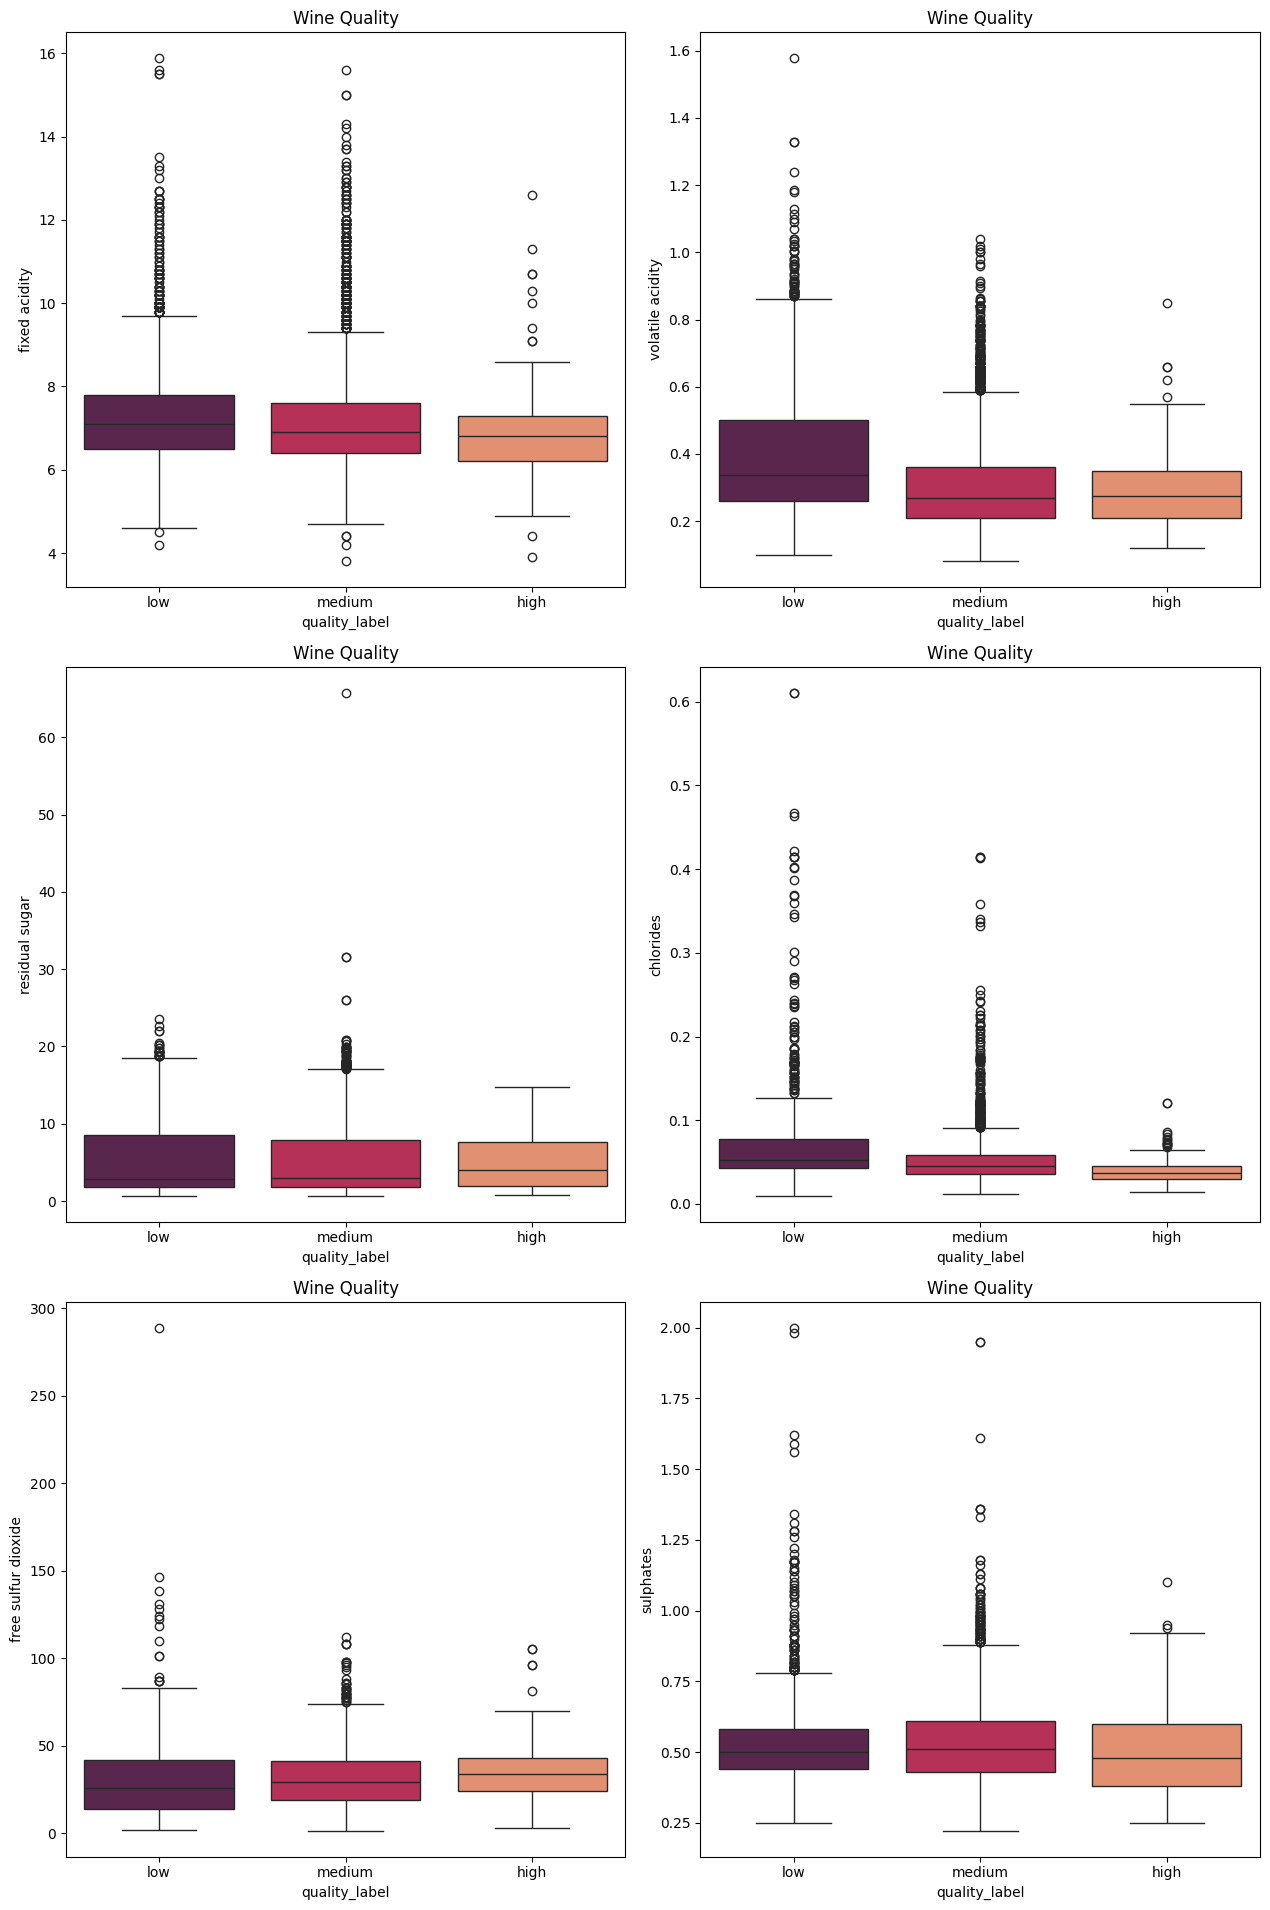

In [37]:
visualise_outliers(wines, skewed_all, 'Wine Quality')

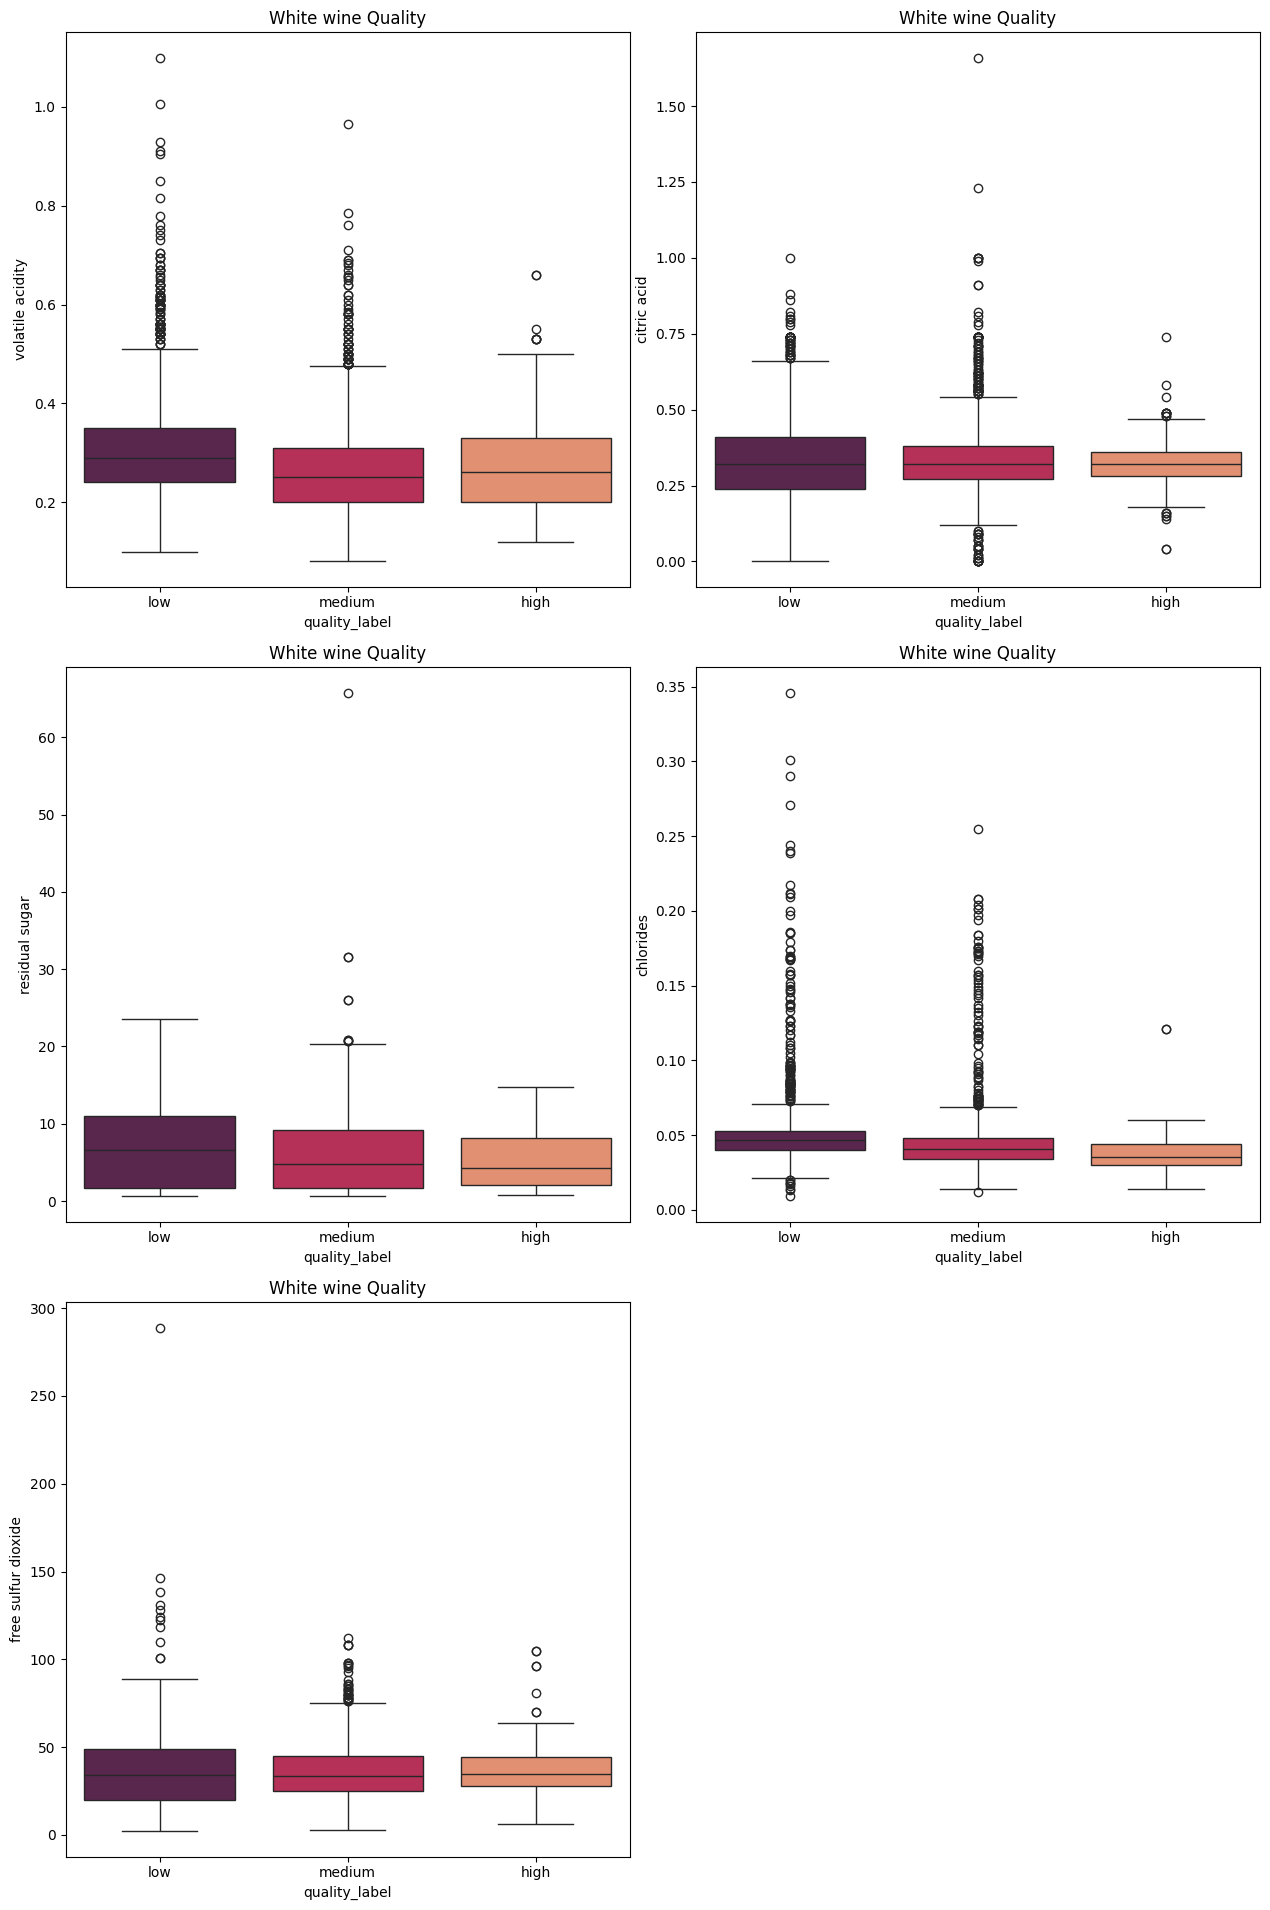

In [ ]:

        
visualise_outliers(white_wine, skewed_white, 'White wine Quality')

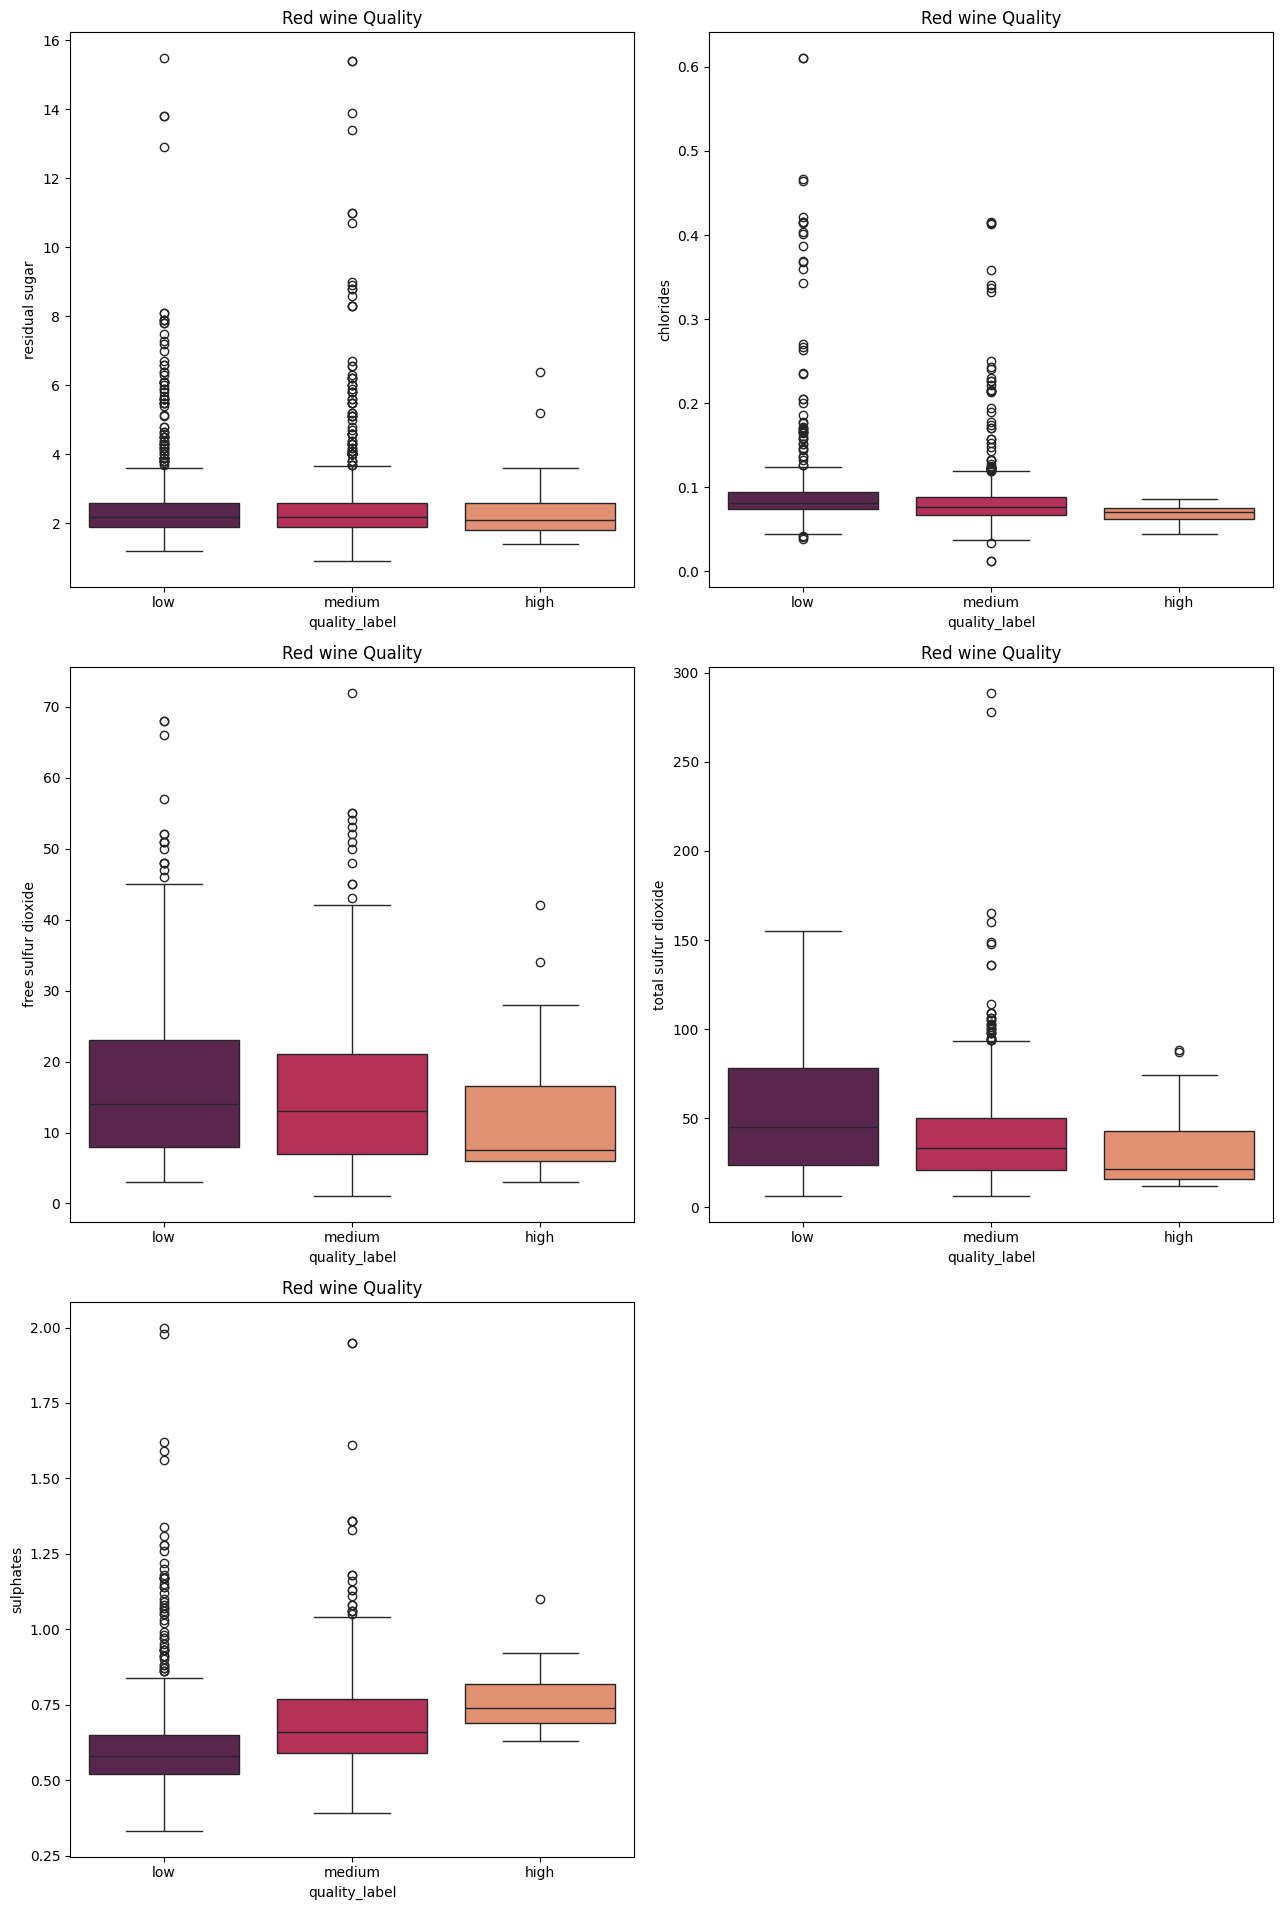

In [ ]:
visualise_outliers(red_wine, skewed_red, 'Red wine Quality')

## remove outliers

Volatile acidity is one of the main indicator of quality and it has some outliers. I will check how many is in the zone over 1.1

In [46]:
count_outliers=wines[wines['volatile acidity']>1.1].count()
print(count_outliers)
wines[wines['volatile acidity']>1.1]


fixed acidity           8
volatile acidity        8
citric acid             8
residual sugar          8
chlorides               8
free sulfur dioxide     8
total sulfur dioxide    8
density                 8
pH                      8
sulphates               8
alcohol                 8
quality                 8
quality_label           8
color                   8
dtype: int64


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_label,color
38,5.7,1.130,0.09,1.50,0.172,7.0,19.0,0.99400,3.50,0.48,9.8,4,low,red wine
126,8.2,1.330,0.00,1.70,0.081,3.0,12.0,0.99640,3.53,0.49,10.9,5,low,red wine
127,8.1,1.330,0.00,1.80,0.082,3.0,12.0,0.99640,3.54,0.48,10.9,5,low,red wine
672,9.8,1.240,0.34,2.00,0.079,32.0,151.0,0.99800,3.15,0.53,9.5,5,low,red wine
690,7.4,1.185,0.00,4.25,0.097,5.0,14.0,0.99660,3.63,0.54,10.7,3,low,red wine
724,7.5,1.115,0.10,3.10,0.086,5.0,12.0,0.99580,3.54,0.60,11.2,4,low,red wine
1299,7.6,1.580,0.00,2.10,0.137,5.0,9.0,0.99476,3.50,0.40,10.9,3,low,red wine
1312,8.0,1.180,0.21,1.90,0.083,14.0,41.0,0.99532,3.34,0.47,10.5,5,low,red wine
